In [65]:
import pandas as pd
import numpy as np
data=pd.read_csv("titanic.csv")
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


1. cabin, embarked 변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 문자형, 범주형 변수들을 각각 charactor, factor형으로 변환하시오. 또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고 age 변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오.

In [66]:
data=data.copy()
data[['cabin', 'embarked']].replace("", np.nan)

,cabin,embarked
0,B5,S
1,C22 C26,S
2,C22 C26,S
3,C22 C26,S
4,C22 C26,S
...,...,...
1304,NaN,C
1305,NaN,C
1306,NaN,C
1307,NaN,C


In [67]:
data['survived']=data['survived'].astype('category')
data['sex']=data['sex'].astype('category')
data['embarked']=data['embarked'].astype('category')

data[['name', 'ticket']]=data[['name', 'ticket']].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   category
 2   name      1309 non-null   object  
 3   sex       1309 non-null   category
 4   age       1046 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   ticket    1309 non-null   object  
 8   fare      1308 non-null   float64 
 9   cabin     295 non-null    object  
 10  embarked  1307 non-null   category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 86.1+ KB


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   int64   
 1   survived  1309 non-null   category
 2   name      1309 non-null   object  
 3   sex       1309 non-null   category
 4   age       1046 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   ticket    1309 non-null   object  
 8   fare      1308 non-null   float64 
 9   cabin     295 non-null    object  
 10  embarked  1307 non-null   category
dtypes: category(3), float64(2), int64(3), object(3)
memory usage: 86.1+ KB


In [69]:
data.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

age->중앙값 대체,  fare->중앙값 대체, cabin->최빈값 대체, embarked->최빈값 대체

In [70]:
data['age']=data['age'].fillna(data['age'].median())
data['fare']=data['fare'].fillna(data['fare'].median())
data['cabin']=data['cabin'].fillna(data['cabin'].mode()[0])
data['embarked']=data['embarked'].fillna(data['embarked'].mode()[0])
data.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

- age변수 구간화

In [71]:
bins = [0,10,20,30,40,50,60,70,80,90]
labels = [0,1,2,3,4,5,6,7,8]

In [72]:
data['age_1']=pd.cut(data['age'], bins, right=False, labels=labels)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,3
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,2


3. 전처리가 완료된 데이터를 train(70%), test(30%) 데이터로 분할하시오. (set.seed(12345)) 를 실행한 후 데이터를 분할하시오. 또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, fare, embarked로 지정하여 예측하는 분류모델을 3개이상 생성하고, test데이터에 대한 예측값을 csv파일로 각각 제출하시오.

In [73]:
from sklearn.model_selection import train_test_split

X = data[['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked']]
y = data[['survived']]
X=pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=12345)

속도 측면에서 Logistic regression, 정확도 측면에서 svm, 기타로 randomforest를 제시한다.

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import time

lr=LogisticRegression()
svc=LinearSVC()
rf=RandomForestClassifier()

In [99]:
def model_result(model, csv_name):
    start=time.time()
    model.fit(X_train, y_train)
    end=time.time()
    
    print(f"{end-start : .5f} sec")
    pred=model.predict(X_test)
    pred_data=pd.DataFrame(pred, columns=['prediction'])
    pred_data.to_csv('{}_predict.csv'.format(csv_name))

In [100]:
#warinng 무시
import warnings
warnings.filterwarnings('ignore')

model_result(lr, 'LogisticRegression')

 0.02796 sec


In [101]:
model_result(svc, 'LinearSVR')

 0.09475 sec


In [102]:
model_result(rf, 'RandomForestClassifier')

 0.41558 sec


4. 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 또, ROC curve를 그리고 AUC값을 산출하시오.

0.7569340128755364


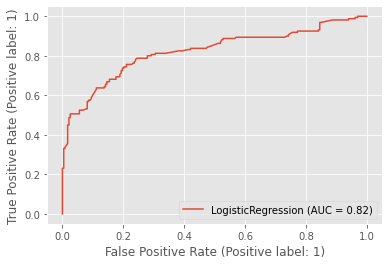

In [103]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
import matplotlib.pyplot as plt

# LogisticRegression
lr_pred = lr.predict(X_test)
print(roc_auc_score(y_test, lr_pred))
plot_roc_curve(lr, X_test, y_test)
plt.show()

0.7857027896995707


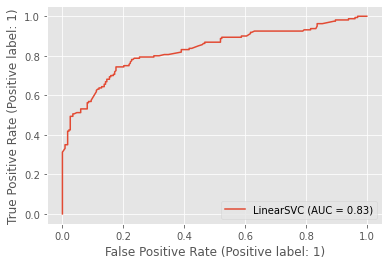

In [104]:
svr_pred = svr.predict(X_test)
print(roc_auc_score(y_test, svr_pred))
plot_roc_curve(svc, X_test, y_test)
plt.show()

0.7360380901287553


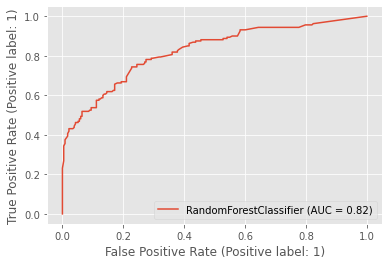

In [105]:
rf_pred = rf.predict(X_test)
print(roc_auc_score(y_test, rf_pred))
plot_roc_curve(rf, X_test, y_test)
plt.show()